A notebook for making a 100-frame movie from 3D dust for Linnea as a test

Two environment variables need to be set in bash: DROPBOX_ROOT, and FFMPEG_ROOT. The DROPBOX_ROOT folder is the path to the top level directory of the dust-holgrams folder shared by Josh. E.g. in bash,

export DROPBOX_ROOT='/Users/catherinezucker/Dropbox/dust-holograms/'

You can also set the path to the FFMPEG executable:

export FFMPEG_PATH='/usr/local/bin'

Ideally, you would set these in your bash_profile profile  (now called zprofile in the latest OS operating systems). Alternatively, if you want to set one of these variables locally in this notebook, you can use:

```
import os
os.environ['DROPBOX_ROOT'] = '/Users/catherinezucker/Dropbox/dust-holograms'
os.environ['FFMPEG_ROOT'] = '/Usr/local/bin'

```

First thing we need to do is figure out how to write some json

In [1]:
import json
import numpy as np
import os
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot as plt
from astropy import table

Josh is having some trouble with ```.zprofile``` so:

In [2]:
if (os.environ.keys() != 'DROPBOX_HOME'):
    os.environ['DROPBOX_ROOT'] = '/Users/jegpeek/Dropbox/dust-holograms'
    os.environ['FFMPEG_ROOT'] = '/Users/jegpeek/'

Using a variable called ```run_name``` to record everything we need about the run

In [3]:
def define_paths(run_name):
    if os.path.isdir("{}/{}/".format(os.environ['DROPBOX_ROOT'],run_name)) == False:
        os.mkdir("{}/{}/".format(os.environ['DROPBOX_ROOT'],run_name))
        os.mkdir("{}/{}/frames/".format(os.environ['DROPBOX_ROOT'],run_name))

This is the camera properties, which we will fix.

In [12]:
arc = True
if arc:
    ec = "szyz"
if not arc:
    ec = "rxyz"

t = True
cprops ={
    "projection": "stereographic",
    "step_size": 1,
    "max_dist": 500.0,
    "fov": 45.0,
    "x_pix": 600,
    "y_pix": 400,
    "vmax": "auto",
    "clip_mode": "tanh",
    "fuzzy": t,
    "randomize_angles": t,
    "euler_convention": ec}

In [11]:
print(cprops)

{'projection': 'stereographic', 'step_size': 1, 'max_dist': 500.0, 'fov': 45.0, 'x_pix': 600, 'y_pix': 400, 'vmax': 'auto', 'clip_mode': 'tanh', 'fuzzy': True, 'randomize_angles': True, 'euler_convention': 'rxyz'}


_In arc mode_ Linnea asked for 100 frames orbiting around a point with equal distance. We'll assume that the middle of these 100 frames is the Sun, and we'll set some sweep out angle in the Galactic Plane.

In [5]:
nframes = 10 # 100 frames
if arc:
    angle_sweep = 45 # half of this CCW and half CW from the sun

In [6]:
def sweep(xc, yc, angle_sweep, nframes):
    R = np.sqrt(xc**2+ yc**2)
    phi =np.arctan2(yc, xc)*180/np.pi
    dangs = np.linspace(0, angle_sweep, nframes)
    xs = xc - R*np.cos((phi-angle_sweep/2+dangs)*np.pi/180)
    ys = yc - R*np.sin((phi-angle_sweep/2+dangs)*np.pi/180)
    angs = (dangs-angle_sweep/2+phi)*np.pi/180 ## wait are these in RADIANs??
    return xs, ys, angs

In [7]:
def plot_ang(x0, y0, xs, ys, run_name):
    plt.figure(figsize=[5, 5])
    plt.scatter(x0, y0)
    plt.scatter(0, 0, c='red')
    plt.plot(xs, ys)
    plt.xlim([-500, 500])
    plt.ylim([-500, 500])
    plt.title(run_name)
    plt.savefig('{}/{}/arc_{}'.format(os.environ['DROPBOX_ROOT'],run_name,run_name))

In track mode we'll move from one 

In [8]:
def build_fprops(fprops, cprops, angs, xs, ys, zc):
    for i in range(nframes):
        fprops.append({
          "xyz": [xs[i], ys[i], zc],
          "angles": [angs[i], 0.0, 0.0]
        })
    allprops = {"camera_props": cprops,"frame_props":fprops }
    return allprops

Let's read in a list of molecular clouds and make movies for each one:

In [9]:
clouds = table.Table.read('{}/Holo_Cloud_Targets.csv'.format(os.environ['DROPBOX_ROOT']))

Chamaeleon


/var/folders/1m/rp2c1skx01d8zdy8z96bkkr80000gn/T/ipykernel_88654/253866891.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  allprops = build_fprops(fprops, cprops, angs, xs, ys, np.float(c['z']))


Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:01 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.007006777728471207
frame 1: vmax = 0.010721173804678984
frame 2: vmax = 0.007423235711663438
frame 3: vmax = 0.008859650579344815
frame 4: vmax = 0.008231068207263888
frame 5: vmax = 0.008720389150446864
frame 6: vmax = 0.00974160552014837
frame 7: vmax = 0.00743002822213748
frame 8: vmax = 0.008864622707089438
frame 9: vmax = 0.007148415121360813
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Ophiuchus
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:02 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.010097797380047268
frame 1: vmax = 0.00934931649738428
frame 2: vmax = 0.03335459617507149
frame 3: vmax = 0.034080401101033206
frame 4: vmax = 0.03169380455667488
frame 5: vmax = 0.029316588775778654
frame 6: vmax = 0.031007848660752645
frame 7: vmax = 0.028312777351347906
frame 8: vmax = 0.02945851305013639
frame 9: vmax = 0.026275940321807866
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Lupus
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:06 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.008161211836748408
frame 1: vmax = 0.008109396622690838
frame 2: vmax = 0.008238850216184802
frame 3: vmax = 0.0077405207120100385
frame 4: vmax = 0.008927859067807731
frame 5: vmax = 0.024781059839064257
frame 6: vmax = 0.03120410173009441
frame 7: vmax = 0.029902858833858775
frame 8: vmax = 0.025807445597478364
frame 9: vmax = 0.021551610268950753
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Taurus
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:14 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.015390081657465998
frame 1: vmax = 0.014561906639368316
frame 2: vmax = 0.01899242977756876
frame 3: vmax = 0.022201344537592378
frame 4: vmax = 0.02470550941921829
frame 5: vmax = 0.026929762141140602
frame 6: vmax = 0.028516034915410274
frame 7: vmax = 0.027758978646559625
frame 8: vmax = 0.024814129023161515
frame 9: vmax = 0.02869233264257855
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Perseus
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:05 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.011951624831001028
frame 1: vmax = 0.010618990142909752
frame 2: vmax = 0.00956918945671896
frame 3: vmax = 0.009988071028576087
frame 4: vmax = 0.011088911431583255
frame 5: vmax = 0.010788525854455656
frame 6: vmax = 0.01712884830907933
frame 7: vmax = 0.016043622843601044
frame 8: vmax = 0.016582236395563086
frame 9: vmax = 0.014825944370419166
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Musca
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:10 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.010314328324173403
frame 1: vmax = 0.008579605412698584
frame 2: vmax = 0.007989148520575327
frame 3: vmax = 0.009897480193598313
frame 4: vmax = 0.007810224795601244
frame 5: vmax = 0.008577845574736785
frame 6: vmax = 0.009294057430453905
frame 7: vmax = 0.007573938393878052
frame 8: vmax = 0.006955241182069585
frame 9: vmax = 0.006858945402023892
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Pipe


/var/folders/1m/rp2c1skx01d8zdy8z96bkkr80000gn/T/ipykernel_88654/253866891.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  allprops = build_fprops(fprops, cprops, angs, xs, ys, np.float(c['z']))


Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:11 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.03450770412474231
frame 1: vmax = 0.03531254090722359
frame 2: vmax = 0.03636389362504997
frame 3: vmax = 0.035639650763216194
frame 4: vmax = 0.03234576408061548
frame 5: vmax = 0.035696492694441986
frame 6: vmax = 0.032692104718917106
frame 7: vmax = 0.030242040224460653
frame 8: vmax = 0.02735930514855136
frame 9: vmax = 0.0255170968267048
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Cepheus
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:05 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.012121776273834258
frame 1: vmax = 0.011025374310041115
frame 2: vmax = 0.011274624091978694
frame 3: vmax = 0.01192999062481158
frame 4: vmax = 0.017348836006006424
frame 5: vmax = 0.016636187660698853
frame 6: vmax = 0.011870959387910262
frame 7: vmax = 0.015438554673939507
frame 8: vmax = 0.01310694776281889
frame 9: vmax = 0.012977740557234939
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Corona_Australis


/var/folders/1m/rp2c1skx01d8zdy8z96bkkr80000gn/T/ipykernel_88654/253866891.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  allprops = build_fprops(fprops, cprops, angs, xs, ys, np.float(c['z']))


Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:07 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.02755006898578722
frame 1: vmax = 0.02622274570018999
frame 2: vmax = 0.02601020280517696
frame 3: vmax = 0.029482591899675753
frame 4: vmax = 0.02885763295188008
frame 5: vmax = 0.0270371550577911
frame 6: vmax = 0.025824218583624315
frame 7: vmax = 0.022952467572024033
frame 8: vmax = 0.020747470474661897
frame 9: vmax = 0.01932309971732866
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Orion_A
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:04:03 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.01408960710824249
frame 1: vmax = 0.01707591638307713
frame 2: vmax = 0.019754948509151292
frame 3: vmax = 0.01701472376131096
frame 4: vmax = 0.016976411127714527
frame 5: vmax = 0.01644404120124091
frame 6: vmax = 0.01568672417648486
frame 7: vmax = 0.014044504805267935
frame 8: vmax = 0.012364566252777877
frame 9: vmax = 0.01274722431788905
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Orion_B
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:03:58 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.015731882399122696
frame 1: vmax = 0.016866145476073142
frame 2: vmax = 0.018094129614444683
frame 3: vmax = 0.0182753456503342
frame 4: vmax = 0.021000926742739467
frame 5: vmax = 0.020372064207731456
frame 6: vmax = 0.017866341562021264
frame 7: vmax = 0.016318146553956466
frame 8: vmax = 0.01840936719876845
frame 9: vmax = 0.019351714386393725
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

Orion_Lambda
Loaded specifications for 10 images.


100% (10 of 10) |########################| Elapsed Time: 0:03:50 ETA:  00:00:00

All workers done.
0.397824734759316
Loading map ...
Ray-casting frames ...
frame 0: vmax = 0.016287759721497423
frame 1: vmax = 0.017698155881556887
frame 2: vmax = 0.017798184020512055
frame 3: vmax = 0.017092601742666375
frame 4: vmax = 0.019296181701576643
frame 5: vmax = 0.02037532189288686
frame 6: vmax = 0.019985673119175772
frame 7: vmax = 0.01802416908039959
frame 8: vmax = 0.017758845950174875
frame 9: vmax = 0.017338056614869857
Worker finished.


ffmpeg version 5.0-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay

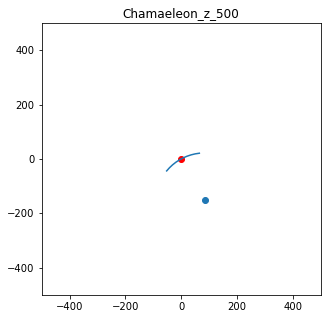

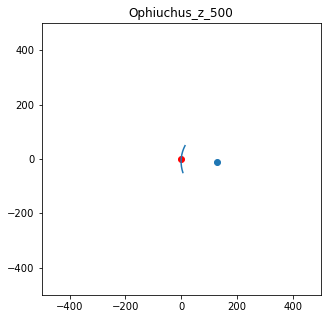

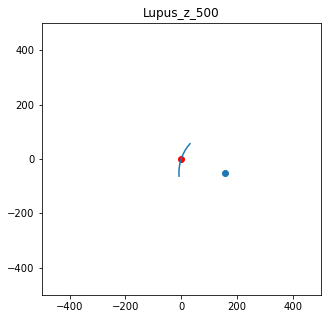

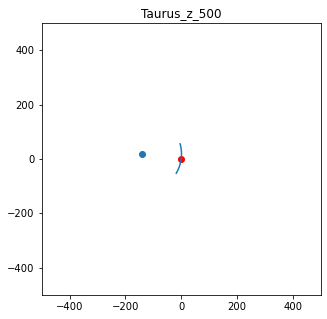

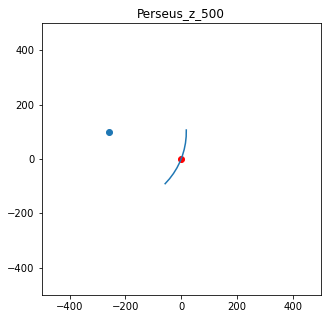

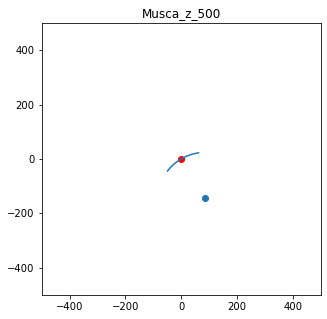

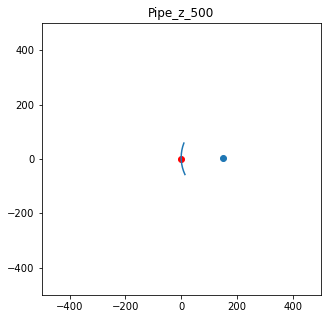

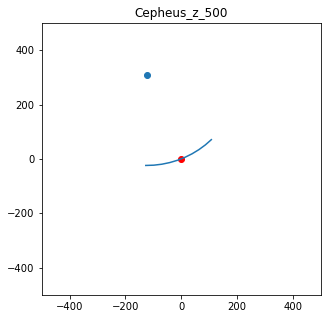

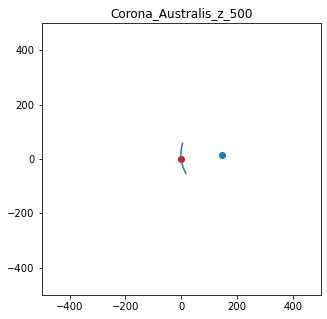

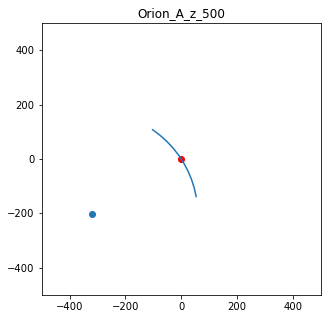

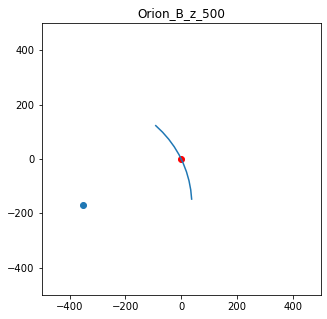

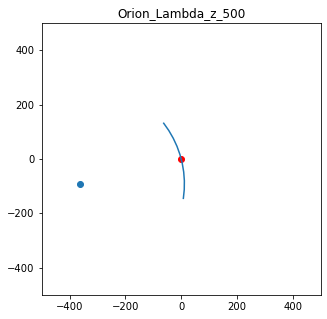

In [10]:
for c in clouds:
    print(c['cloud'])
    run_name = c['cloud'] + '_z_500'
    define_paths(run_name)
    xs, ys, angs = sweep(c['x'], c['y'], angle_sweep, nframes)
    plot_ang(c['x'], c['y'], xs, ys, run_name)
    # we make an empty list of frames to which we can append frames
    fprops = []
    allprops = build_fprops(fprops, cprops, angs, xs, ys, np.float(c['z']))
    with open('{}/{}/{}.json'.format(os.environ['DROPBOX_ROOT'],run_name,run_name), 'w') as outfile:
        json.dump(allprops, outfile,indent=2)
    os.system("python3 project_frames.py {}/{}/{}.json {}/leike2020_bayestar19_splice.npy {}/{}/frames/{}_{{:05d}}.png"
          .format(os.environ['DROPBOX_ROOT'],run_name,run_name,os.environ['DROPBOX_ROOT'],os.environ['DROPBOX_ROOT'],run_name, run_name))
    
    os.system("{}/ffmpeg -r 30 -start_number 0 -i {}/{}/frames/{}_%05d.png -c:v libx264 -s 600x400 -r 30 -pix_fmt yuv420p {}/{}/{}.mp4"
          .format(os.environ['FFMPEG_ROOT'],os.environ['DROPBOX_ROOT'],run_name,run_name,os.environ['DROPBOX_ROOT'],run_name, run_name))
